In [1]:
from sklearn.linear_model import LogisticRegression 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [2]:
X=pd.read_csv('../train_x.csv')
Y=pd.read_csv('../train_y.csv')
Y=Y['target']
#X.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:


x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [4]:
clf=LogisticRegression(C=0.25, max_iter=25, penalty='l1', solver='liblinear',
                   tol=1e-06)
clf.fit(x_train,y_train)
y_prob=clf.predict_proba(x_train)
y_prob_pos=y_prob[:,1]
y_pred=clf.predict(x_train)

c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [5]:
score=roc_auc_score(y_train,y_prob_pos)
print('AUC score is '+str(score))
print('Accuracy score is :'+str(accuracy_score(y_train,y_pred)))
print('precision  is :'+str(precision_score(y_train,y_pred)))
print('f1 score is :'+str(f1_score(y_train,y_pred)))
print('recall score is :'+str(recall_score(y_train,y_pred)))


AUC score is 0.6834056232598958
Accuracy score is :0.8715275075869582
precision  is :0.75
f1 score is :0.01078490113840623
recall score is :0.005431502715751358


In [6]:
y_prob_test=clf.predict_proba(x_test)
y_prob_pos_test=y_prob_test[:,1]
score=roc_auc_score(y_test,y_prob_pos_test)
y_pred_test=clf.predict(x_test)
print('AUC score is '+str(score))
print('Accuracy score is :'+str(accuracy_score(y_test,y_pred_test)))
print('precision  is :'+str(precision_score(y_test,y_pred_test)))
print('f1 score is :'+str(f1_score(y_test,y_pred_test)))
print('recall score is :'+str(recall_score(y_test,y_pred_test)))

AUC score is 0.6480430291842475
Accuracy score is :0.8602033405954974
precision  is :0.25
f1 score is :0.0025906735751295338
recall score is :0.0013020833333333333


In [7]:
y_pred_test=clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred_test)
score=clf.score(x_test,y_test)
print(cm)
print(score)

[[4737    3]
 [ 767    1]]
0.8602033405954974


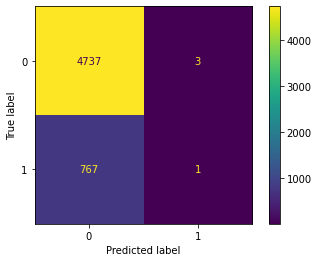

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()


In [9]:
only_zeros=[0 for _ in range(len(y_train))]

In [10]:
score=roc_auc_score(y_train,only_zeros)
print('AUC score is '+str(score))

AUC score is 0.5


In [11]:
fpr, tpr, threshold = roc_curve(y_train, y_prob_pos)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_train, only_zeros)

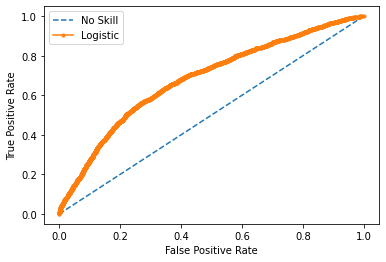

In [12]:
import matplotlib.pyplot as plt
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

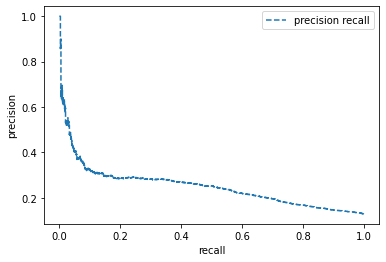

In [13]:
precision,recall,threshold=precision_recall_curve(y_train, y_prob_pos)
plt.plot(recall, precision, linestyle='--', label='precision recall')

# axis labels
plt.xlabel('recall')
plt.ylabel('precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [14]:
threshold=np.insert(threshold,0,0)


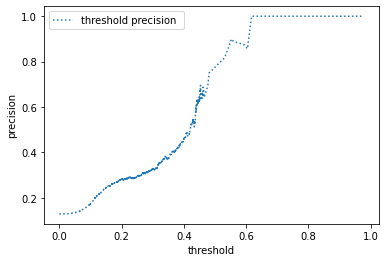

In [15]:
plt.plot(threshold, precision, linestyle='dotted', label='threshold precision ')

# axis labels
plt.xlabel('threshold')
plt.ylabel('precision')
# show the legend
plt.legend()
# show the plot
plt.show()



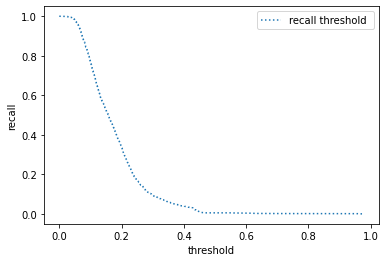

In [16]:
plt.plot(threshold, recall, linestyle='dotted', label='recall threshold ')

# axis labels
plt.xlabel('threshold')
plt.ylabel('recall')
# show the legend
plt.legend()
# show the plot
plt.show()

In [19]:
X_val=pd.read_csv('../test_x.csv')

In [20]:
test_proba=clf.predict_proba(X_val)
y_prob_pos_test=test_proba[:,1]

In [21]:
y_val=pd.read_csv('../test_y.csv')

In [22]:
y_val['target']=y_prob_pos_test

In [23]:
y_val.to_csv('logit.csv',index=False)